In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Fatou Fall/Downloads/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Valeurs manquantes
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Séparer les caractéristiques d'entrée (X) de la variable cible (Y)
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [9]:
# Séparer les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

In [12]:
# Normaliser les données
scaler = MinMaxScaler()
x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)

In [13]:
# Créer le modèle de réseau de neurones
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#La fonction d'activation "sigmoid" est utilisée dans la dernière couche du modèle pour effectuer une classification binaire.
#Dans notre jeu de données sur le diabète, la variable cible "Outcome" indique 
#si une personne est atteinte de diabète (1) ou non (0)

In [14]:
# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Afficher un résumé du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Entraîner le modèle
history = model.fit(x_train_scal, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 9ms/step - loss: 0.6646 - accuracy: 0.6415 - val_loss: 0.6651 - val_accuracy: 0.6260
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.6477 - val_loss: 0.6607 - val_accuracy: 0.6179
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6348 - accuracy: 0.6558 - val_loss: 0.6448 - val_accuracy: 0.6179
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.6701 - val_loss: 0.6279 - val_accuracy: 0.6098
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.6741 - val_loss: 0.6121 - val_accuracy: 0.6016
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.6741 - val_loss: 0.5937 - val_accuracy: 0.6423
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.7047 - val_loss: 0.5779 - val_accuracy: 0.7073
Epoch 8/100
1

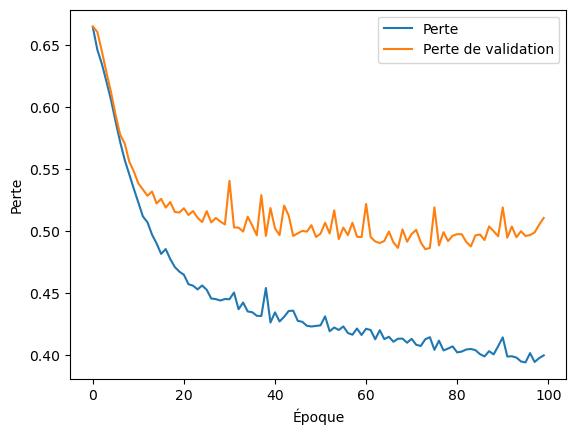

In [19]:
# Afficher les graphiques d'entraînement
plt.plot(history.history['loss'], label='Perte')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.show()


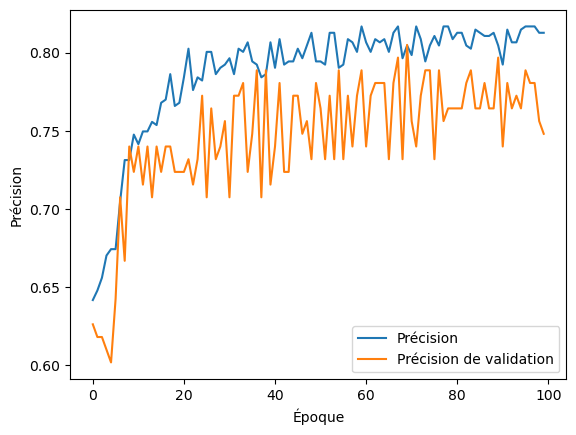

In [20]:
plt.plot(history.history['accuracy'], label='Précision')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()

In [21]:
# Évaluer le modèle sur les données de test
scores = model.evaluate(x_test_scal, y_test)
print('Perte de test :', scores[0])
print('Précision de test :', scores[1])

# Faire des prédictions sur les données de test
predictions = model.predict(x_test_scal)

5/5 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7468
Perte de test : 0.5385205149650574
Précision de test : 0.7467532753944397
5/5 [==============================] - 0s 2ms/step


In [25]:
# Calcul du coefficient de détermination (R2 score)
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.1977509369497401


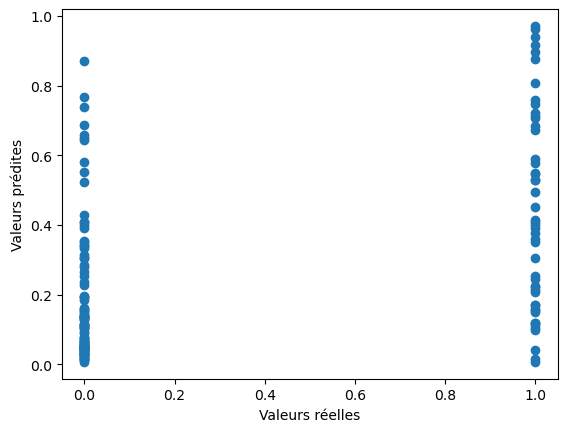

In [26]:
# Tracé du graphique de dispersion
plt.scatter(y_test, y_pred)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.show()

Précision :  0.7207792207792207
Rappel :  0.5789473684210527
Aire sous la courbe ROC :  0.799059504431181


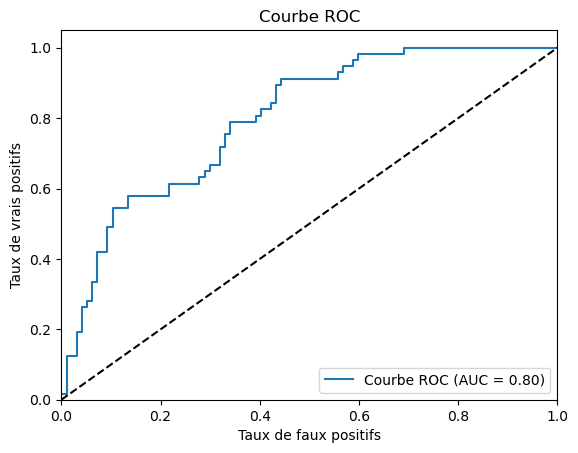

In [29]:

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred_binary)
print("Précision : ", accuracy)

# Calcul du rappel
recall = recall_score(y_test, y_pred_binary)
print("Rappel : ", recall)

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Aire sous la courbe ROC : ", roc_auc)

# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


In [30]:
# Charger les données d'une personne
person_data = pd.DataFrame({
    'Pregnancies': [6],
    'Glucose': [148],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627],
    'Age': [50]
})

In [31]:
# Normaliser les données de la personne
person_data_scal = scaler.transform(person_data)

# Faire la prédiction
prediction = model.predict(person_data_scal)

# Convertir la prédiction en 0 (non diabétique) ou 1 (diabétique)
if prediction[0] >= 0.5:
    result = "diabétique"
else:
    result = "non diabétique"

print("La personne est", result)

1/1 [==============================] - 0s 28ms/step
La personne est diabétique
